#IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Make plots pretty
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

#Dataset

In [35]:
_DOWNLOAD_URL_WHITE_WINES = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
_DOWNLOAD_URL_RED_WINES = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
red_wine = pd.read_csv(_DOWNLOAD_URL_RED_WINES, sep=";")
white_wine = pd.read_csv(_DOWNLOAD_URL_WHITE_WINES, sep=";")
# Add a column to identify type
red_wine["type"] = 1
white_wine["type"] = 0

# Combine datasets
wine = pd.concat([red_wine, white_wine], ignore_index=True)
print("Shape of dataset:", wine.shape)
print("\nColumn names:", wine.columns.tolist())

Shape of dataset: (6497, 13)

Column names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']


#Visualisation


First 5 rows:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     1  
1      9.8    

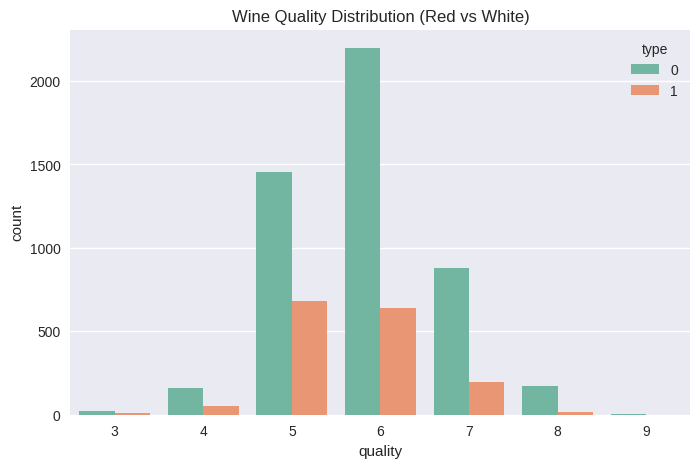

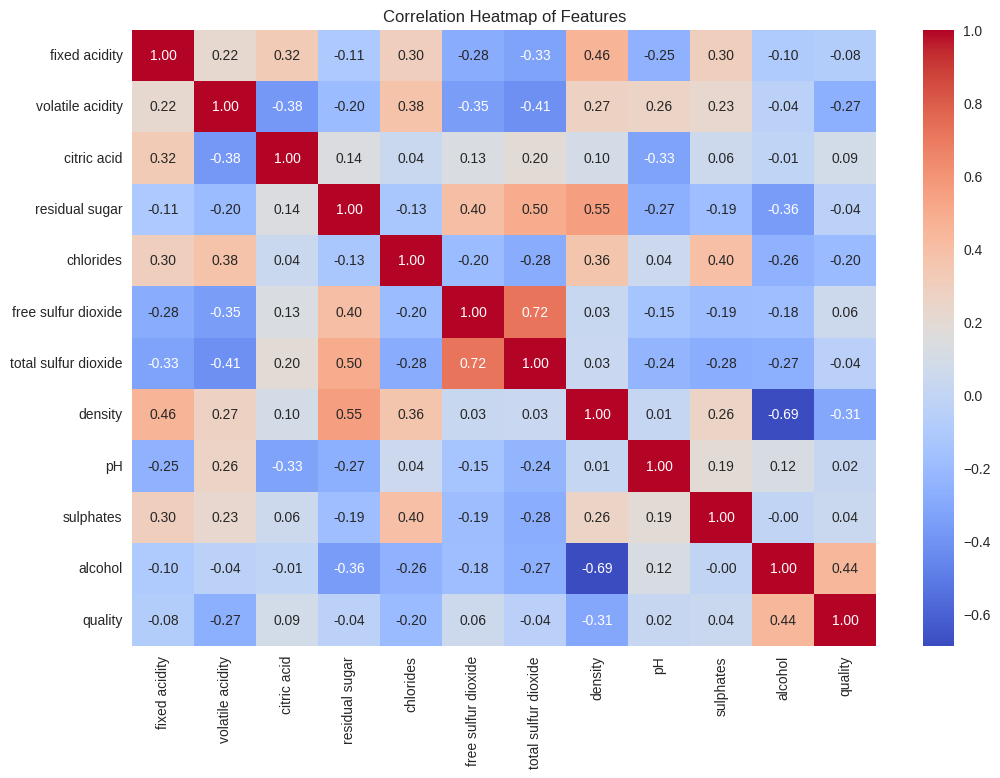

In [38]:
# -----------------------------
# 3. Quick Exploration
# -----------------------------
print("\nFirst 5 rows:\n", wine.head())

print("\nSummary statistics:\n", wine.describe())

print("\nMissing values:\n", wine.isnull().sum())

# -----------------------------
# 4. Visualizations
# -----------------------------

# Distribution of wine quality scores
plt.figure(figsize=(8,5))
sns.countplot(x="quality", data=wine, hue="type")
plt.title("Wine Quality Distribution (Red vs White)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
corr = wine.drop(columns=["type"]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features")
plt.show()

plt.show()

#SVM Object


In [36]:
# -----------------------------
# 1. Imports for modeling
# -----------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# 2. Prepare Data
# -----------------------------
X = wine.drop(columns=["quality"])  # features (remove target + type)
y = wine["quality"]                         # target = quality

# Optionally: collapse into binary classification (Good vs Bad wine)
# Uncomment if you want binary classification instead of multiclass
# y = y.apply(lambda q: 1 if q >= 6 else 0)  # 1=Good (>=6), 0=Bad (<6)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# # Standardize features (important for SVM!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# 3. Create SVM Object & Train
# -----------------------------
svm_clf = SVC(kernel="rbf", C=10, gamma="scale")  # SVM object
svm_clf.fit(X_train, y_train)

SVC(C=10)

Prediction and result

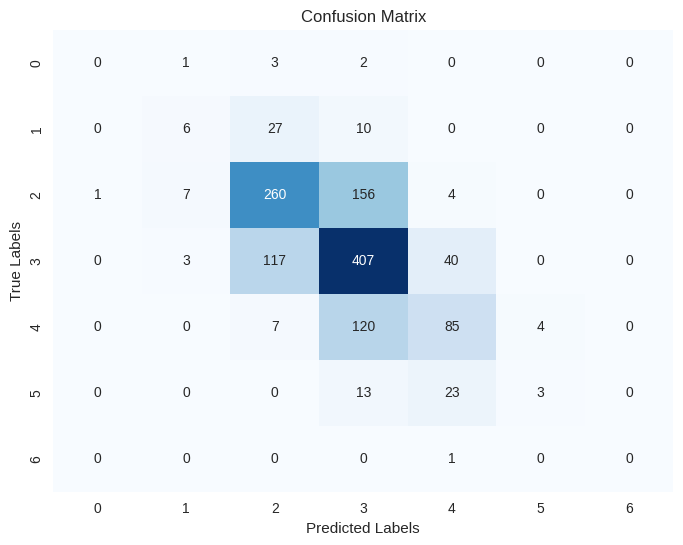


Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.35      0.14      0.20        43
           5       0.63      0.61      0.62       428
           6       0.57      0.72      0.64       567
           7       0.56      0.39      0.46       216
           8       0.43      0.08      0.13        39
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1300
   macro avg       0.36      0.28      0.29      1300
weighted avg       0.57      0.59      0.57      1300



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
# -----------------------------
# 4. Predictions & Evaluation
# -----------------------------
y_pred = svm_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))